# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

In [ ]:


# Import the package for learning and modeling trees
from sklearn import tree 
# Define the matrix containing the data (one example per row) and the vector containing the corresponding target value
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]
# Declare the classification model you want to use and then fit the model to the data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
# Predict the target value (and print it) for the passed data, using the fitted model currently in clf
print(clf.predict([[0, 1, 1]]))
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[0]
[1 0]


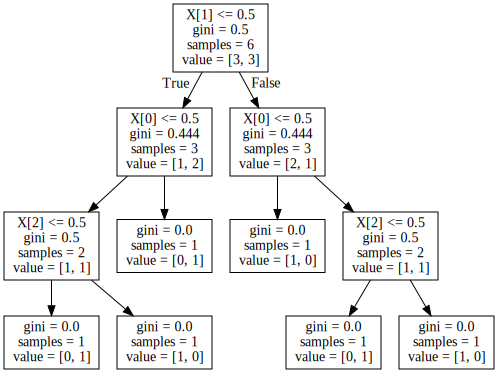

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Start using iris dataset (from UCI Machine Learning repository)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [ ]:
#random_state: Controls the randomness of the estimator
#class_weight: If None, all classes are supposed to have weight one.
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [ ]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

Fit the learning model on training set

In [ ]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

Obtain predictions

In [ ]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [ ]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [ ]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

Obtain model performance results

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


Use Cross Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)

scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


Compute f1 score

In [ ]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree

1) Save as pdf
2) Generate a picture here

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


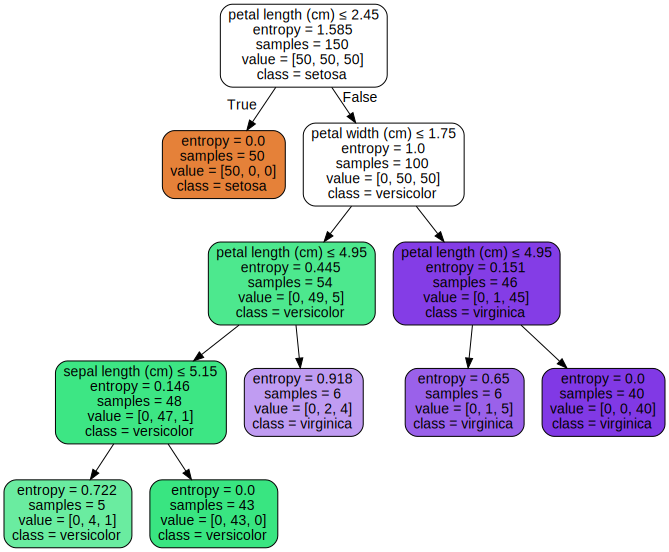

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

print(list(iris.feature_names))
print(list(iris.target_names))

# 2) generate picture here
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

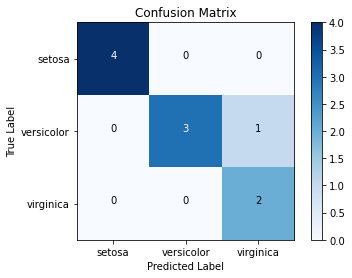

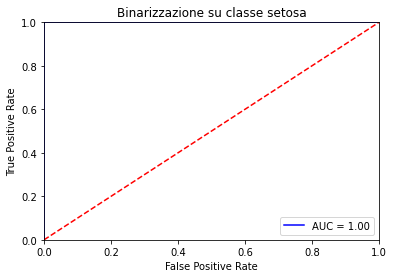

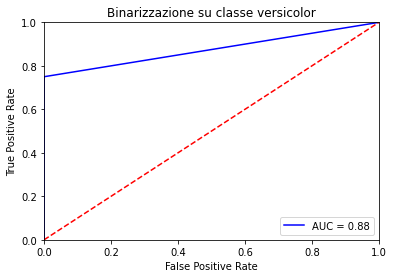

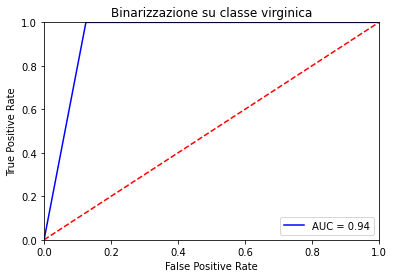

In [ ]:
predicted = clf.predict(iris_X_test)

draw_confusion_matrix(iris_y_test, predicted)

binary_pred_y_test_1,binary_pred_y_test_2,binary_pred_y_test_3,binary_iris_y_test_1,binary_iris_y_test_2,binary_iris_y_test_3 = binarize_y(iris_y_test,predicted)
        
#plot del primo albero binarizzato 
roc_curve_plot(binary_iris_y_test_1, binary_pred_y_test_1,"setosa")
        
#plot del secondo albero binarizzato 
roc_curve_plot(binary_iris_y_test_2, binary_pred_y_test_2, "versicolor")
    
#plot del terzo albero binarizzato 

roc_curve_plot(binary_iris_y_test_3, binary_pred_y_test_3, "virginica")



# Esercizi

In [ ]:
# 5) build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created:
# for each model you have to build three curves, one for each class, considered in turn as the positive class.
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import itertools


def roc_curve_plot(y_test, y_pred, clas):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)


    
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title('Binarizzazione su classe '+str(clas))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def binarize_y(iris_y_test,predicted_y_test):
    #binarizzazione delle y predette
    dim = len(iris_y_test)
    binary_pred_y_test_1 = np.zeros(dim)
    binary_pred_y_test_2 = np.zeros(dim)
    binary_pred_y_test_3 = np.zeros(dim)
    for i in range(0, dim):
        if(predicted_y_test[i] == 0):
            binary_pred_y_test_1[i] = 1
        if(predicted_y_test[i] == 1):
            binary_pred_y_test_2[i] = 1
        if(predicted_y_test[i] == 2):
            binary_pred_y_test_3[i] = 1

    #binarizzazione delle y reali
    binary_iris_y_test_1 = np.zeros(dim)
    binary_iris_y_test_2 = np.zeros(dim)
    binary_iris_y_test_3 = np.zeros(dim)
    for i in range(0, dim):
        if(iris_y_test[i] == 0):
            binary_iris_y_test_1[i] = 1
        if(iris_y_test[i] == 1):
            binary_iris_y_test_2[i] = 1
        if(iris_y_test[i] == 2):
            binary_iris_y_test_3[i] = 1
    return binary_pred_y_test_1,binary_pred_y_test_2,binary_pred_y_test_3,binary_iris_y_test_1,binary_iris_y_test_2,binary_iris_y_test_3

def draw_confusion_matrix(iris_y_test, predicted_y_test):
    class_names = iris.target_names
    y_true = iris.target
    cf = confusion_matrix(iris_y_test, predicted_y_test)
    plt.figure()
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j, i, cf[i, j],horizontalalignment="center",color="white" if cf[i, j] > thresh else "black",)
    plt.colorbar()
    plt.show()

# I grafici li creo mano a mano per ogni modello generato

# Esercizio 1 and 2
1) get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.

Before artificial inflaction:
Total training data:  140
Number of 'setosa' element:  46
Number of 'versicolor' element:  46
Number of 'virginica' element:  48

After artificial inflaction:
Total training data:  986
Number of 'setosa' element:  46
Number of 'versicolor' element:  460
Number of 'virginica' element:  480 


 On train set

Accuracy score: 1.0
F1 score: 1.0

 On test set

Accuracy score: 0.9
F1 score: 0.8857142857142858


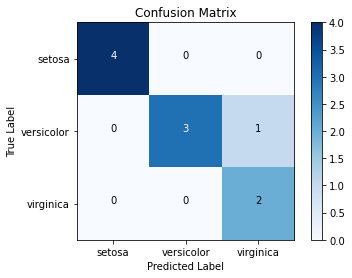

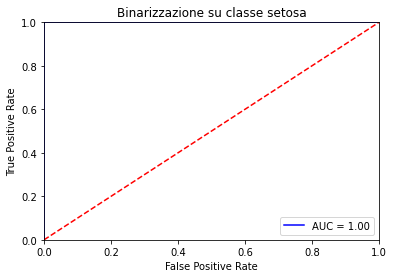

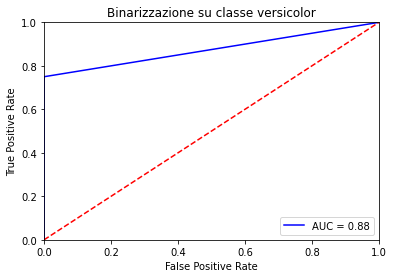

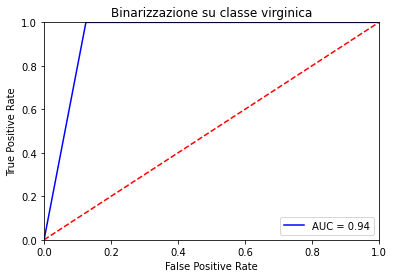

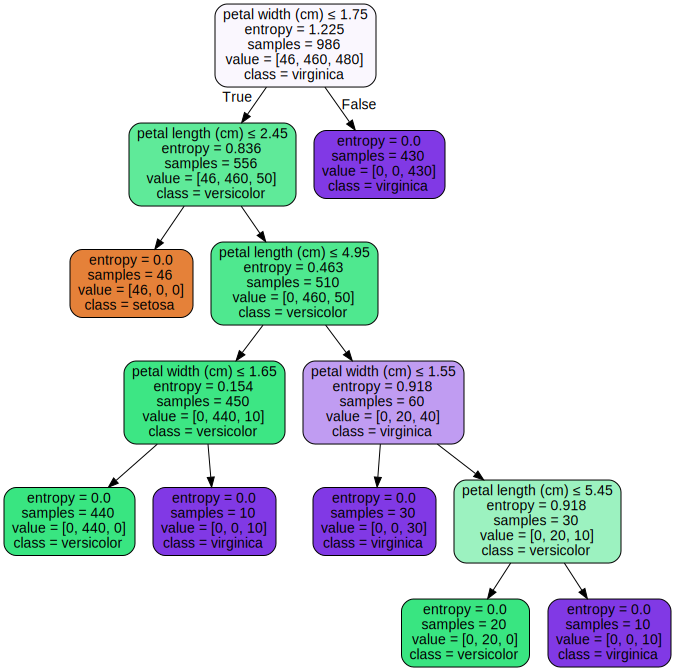

In [ ]:
# Raccolgo i dati dalle precedenti celle
data = iris_X_train
target = iris_y_train

print("Before artificial inflaction:")
print("Total training data: ", len(target))
print("Number of 'setosa' element: ", np.count_nonzero(target == 0))
print("Number of 'versicolor' element: ", np.count_nonzero(target == 1))
print("Number of 'virginica' element: ", np.count_nonzero(target == 2))

# Target names: ['setosa' 'versicolor' 'virginica']
# Genero l' inflazione artificiale di esempi
inflate_params = [1, 10, 10]

tmp_data = []
tmp_target = []
for i in range(len(data)):
    # range 10 per versicolor e virginica, 1 per setosa
    for j in range(inflate_params[target[i]]):
      tmp_data.append(data[i])
      tmp_target.append(target[i])

data = np.array(tmp_data)
target = np.array(tmp_target)

print("\nAfter artificial inflaction:")
print("Total training data: ", len(target))
print("Number of 'setosa' element: ", np.count_nonzero(target == 0))
print("Number of 'versicolor' element: ", np.count_nonzero(target == 1))
print("Number of 'virginica' element: ", np.count_nonzero(target == 2),"\n")

#costruisco un nuovo classificatore ma questa volta modifico i pesi
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300)

# Fit model with data
clf = clf.fit(data, target)

# Compute accuracy and F1 score
print("\n On train set")
predicted = clf.predict(data)
acc_score = accuracy_score(target, predicted)
print("\nAccuracy score: " + str(acc_score))
f1 = f1_score(target, predicted, average='macro')
print("F1 score: " + str(f1))

print("\n On test set")
predicted = clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted)
print("\nAccuracy score: " + str(acc_score))
f1 = f1_score(iris_y_test, predicted, average='macro')
print("F1 score: " + str(f1))

draw_confusion_matrix(iris_y_test, predicted)

binary_pred_y_test_1,binary_pred_y_test_2,binary_pred_y_test_3,binary_iris_y_test_1,binary_iris_y_test_2,binary_iris_y_test_3 = binarize_y(iris_y_test,predicted)
        
#plot del primo albero binarizzato 
roc_curve_plot(binary_iris_y_test_1, binary_pred_y_test_1,"setosa")
        
#plot del secondo albero binarizzato 
roc_curve_plot(binary_iris_y_test_2, binary_pred_y_test_2, "versicolor")
    
#plot del terzo albero binarizzato 

roc_curve_plot(binary_iris_y_test_3, binary_pred_y_test_3, "virginica")



# Draw tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

2) Modifica del peso di una classe ('setosa':1 'versicolor':10 'virginica':10) + Matrice di confusione + Curva ROC

Accuracy score: 0.9
F1 score: 0.8857142857142858


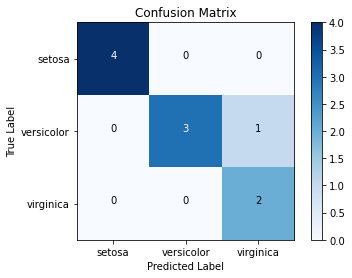

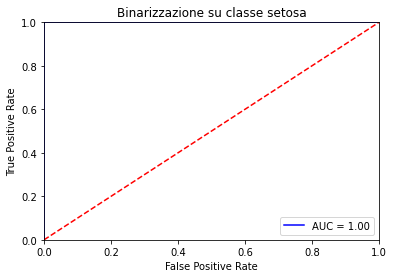

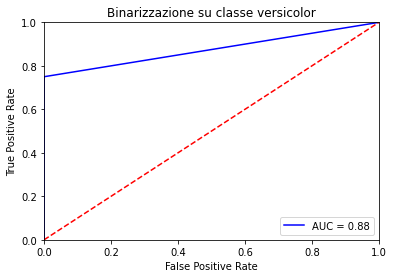

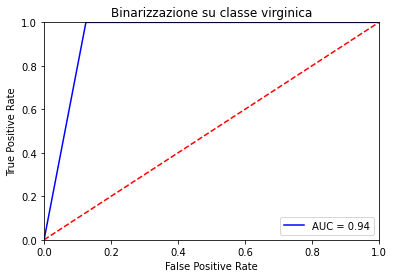

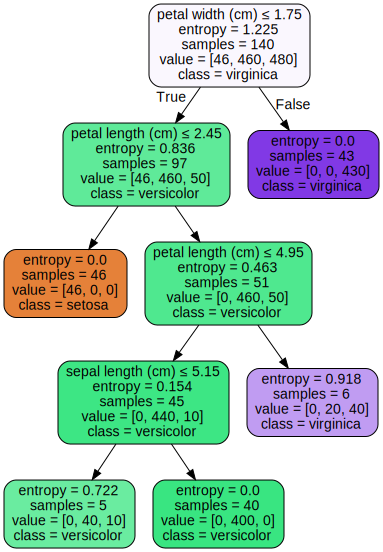

In [ ]:
#Domanda 1.b): Modifica del peso di una classe ('setosa':1 'versicolor':10 'virginica':10) + Matrice di confusione + Curva ROC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
iris = load_iris()
clf_w = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:10})

clf_w = clf_w.fit(iris_X_train, iris_y_train)

# apply fitted model "clf" to the test set 
predicted_y_test = clf_w.predict(iris_X_test)

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1)) 

draw_confusion_matrix(iris_y_test, predicted_y_test)

binary_pred_y_test_1,binary_pred_y_test_2,binary_pred_y_test_3,binary_iris_y_test_1,binary_iris_y_test_2,binary_iris_y_test_3 = binarize_y(iris_y_test,predicted_y_test)

#plot del primo albero binarizzato 
roc_curve_plot(binary_iris_y_test_1, binary_pred_y_test_1,"setosa")
        
#plot del secondo albero binarizzato 
roc_curve_plot(binary_iris_y_test_2, binary_pred_y_test_2, "versicolor")
    
#plot del terzo albero binarizzato 

roc_curve_plot(binary_iris_y_test_3, binary_pred_y_test_3, "virginica")



dot_data = tree.export_graphviz(clf_w, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

# Esercizio 3
3) learn trees but avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.


 On train set

Accuracy score: 0.9642857142857143
F1 score: 0.9645028511007894

 On test set

Accuracy score: 0.9
F1 score: 0.8857142857142858


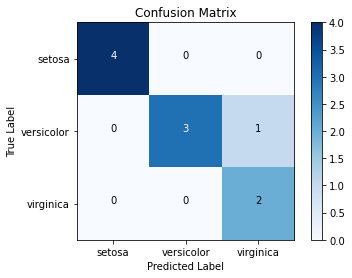

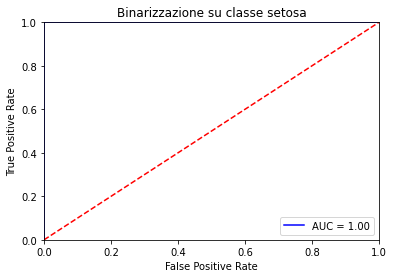

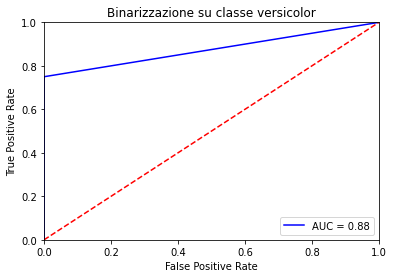

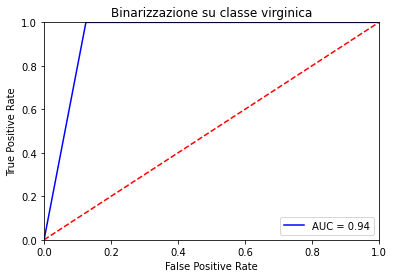

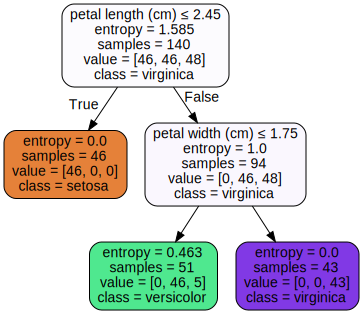

In [ ]:
data = iris_X_train
target = iris_y_train

tuned_clf = tree.DecisionTreeClassifier(criterion="entropy",
                                          random_state=300,
                                          min_samples_leaf=3,
                                          min_impurity_decrease=0.01,
                                          max_depth=5,
                                          max_leaf_nodes=3,
                                          class_weight={0:1, 1:1, 2:1})
# Fit and predict
tuned_clf = tuned_clf.fit(data, target)

# Compute accuracy and F1 score
print("\n On train set")
predicted = tuned_clf.predict(iris_X_train)
acc_score = accuracy_score(iris_y_train, predicted)
print("\nAccuracy score: " + str(acc_score))
f1 = f1_score(iris_y_train, predicted, average='macro')
print("F1 score: " + str(f1))

print("\n On test set")
predicted = tuned_clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted)
print("\nAccuracy score: " + str(acc_score))
f1 = f1_score(iris_y_test, predicted, average='macro')
print("F1 score: " + str(f1))


draw_confusion_matrix(iris_y_test, predicted)


binary_pred_y_test_1,binary_pred_y_test_2,binary_pred_y_test_3,binary_iris_y_test_1,binary_iris_y_test_2,binary_iris_y_test_3 = binarize_y(iris_y_test,predicted)

#plot del primo albero binarizzato 
roc_curve_plot(binary_iris_y_test_1, binary_pred_y_test_1,"setosa")
        
#plot del secondo albero binarizzato 
roc_curve_plot(binary_iris_y_test_2, binary_pred_y_test_2, "versicolor")
    
#plot del terzo albero binarizzato 

roc_curve_plot(binary_iris_y_test_3, binary_pred_y_test_3, "virginica")



# Draw tree
dot_data = tree.export_graphviz(tuned_clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph